# Eksamen


## Bilmarkedet
Af: Mathias Nikolaisen(dnt357), Oliver Mattthews(jvc975) & Clara Maj Folkmann(djz279)

### Problem 1

In [1]:
#1.a
import pandas as pd
df = pd.read_csv("cars.csv")

In [2]:
df.describe()

,year,product_id,sales,number_households,price,height,footprint,weight,hp,mpg,...,HEV,PHEV,EV,car,suv,truck,van,market_share,no_car,dlogS
count,9694.000000,9694.000000,9694.000000,9.694000e+03,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,...,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9.694000e+03,9694.000000,9694.000000
mean,2001.096761,486.674954,59103.391036,1.072133e+08,36.047691,60.948141,13392.630004,3561.211136,192.181968,20.936151,...,0.032907,0.007737,0.008665,0.631937,0.231277,0.070559,0.066227,1.422180e-03,0.650272,-7.252747
std,11.076957,278.997528,86940.254077,1.393279e+07,17.126564,8.411517,1968.915195,897.765526,83.882441,6.583005,...,0.178402,0.087622,0.092687,0.482303,0.421671,0.256100,0.248690,2.098420e-03,0.048143,1.961685
min,1980.000000,0.000000,10.000000,8.078000e+07,11.144782,43.500000,6514.540000,1113.000000,44.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.980669e-07,0.578260,-15.081906
25%,1992.000000,252.000000,7990.500000,9.567000e+07,24.081777,54.700000,12000.155000,2925.000000,127.500000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.831745e-04,0.619893,-8.189256
50%,2002.000000,512.000000,27394.000000,1.093000e+08,31.820235,57.700000,13330.064000,3470.500000,175.000000,19.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.379377e-04,0.644168,-6.919975
75%,2011.000000,693.000000,74560.500000,1.186800e+08,43.404583,67.100000,14532.730000,4045.500000,250.000000,23.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.779007e-03,0.672930,-5.887575
max,2018.000000,1066.000000,891482.000000,1.275900e+08,99.986388,107.500000,21821.859000,8550.000000,645.000000,50.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.104001e-02,0.777283,-3.318301


In [3]:
import numpy as np
# 'type' based on dummys
conditions = [
    df['car'] == 1,
    df['suv'] == 1,
    df['truck'] == 1,
    df['van'] == 1
]
choices = ['car', 'suv', 'truck', 'van']
df['type'] = np.select(conditions, choices, default='other')

# Group & average
grouped_data = df.groupby(['year', 'type']).agg({
    'price': 'mean',
    'market_share': 'mean',
    'hp': 'mean',
    'mpg': 'mean',
    'footprint': 'mean',
    'weight': 'mean'
}).reset_index()

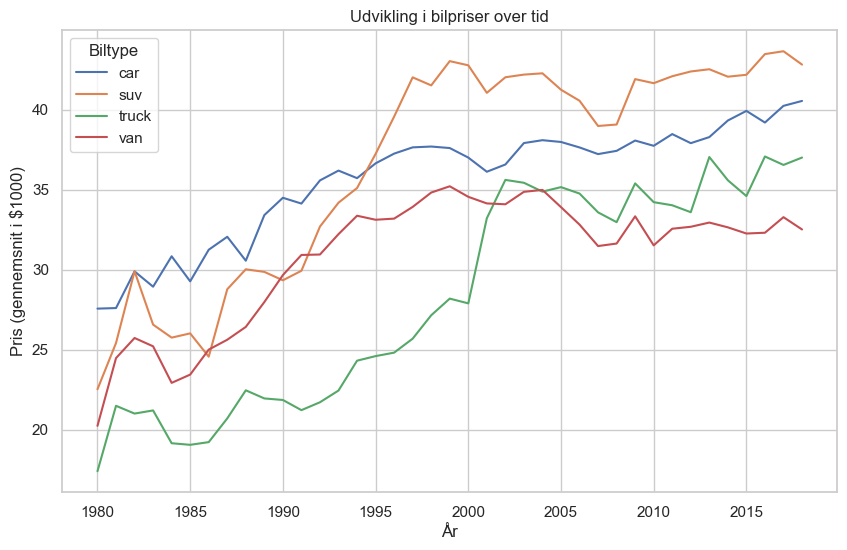

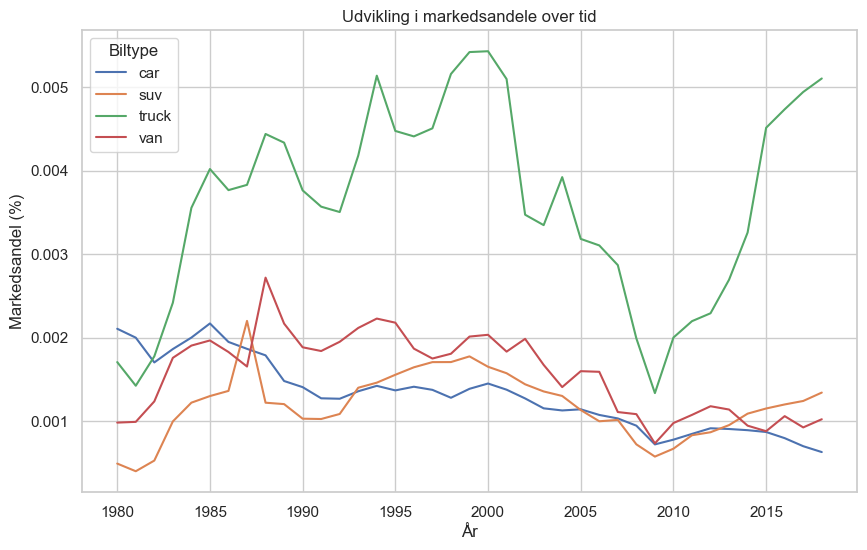

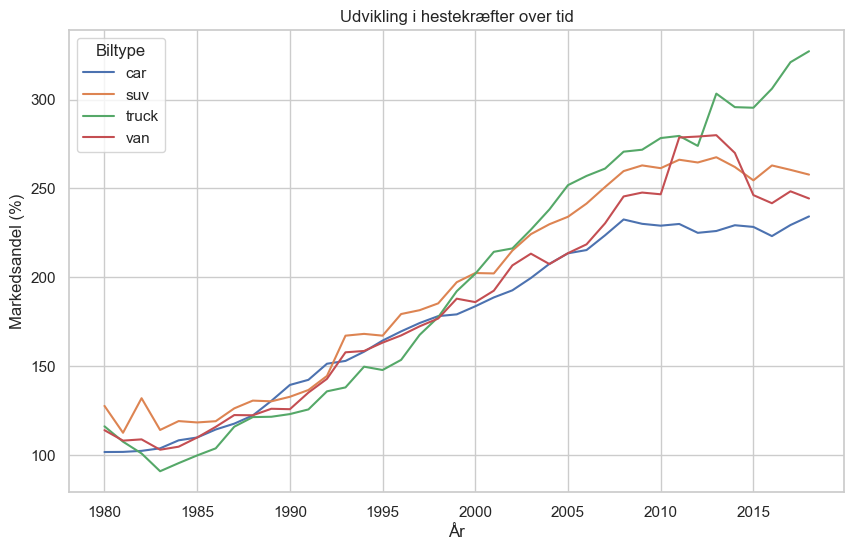

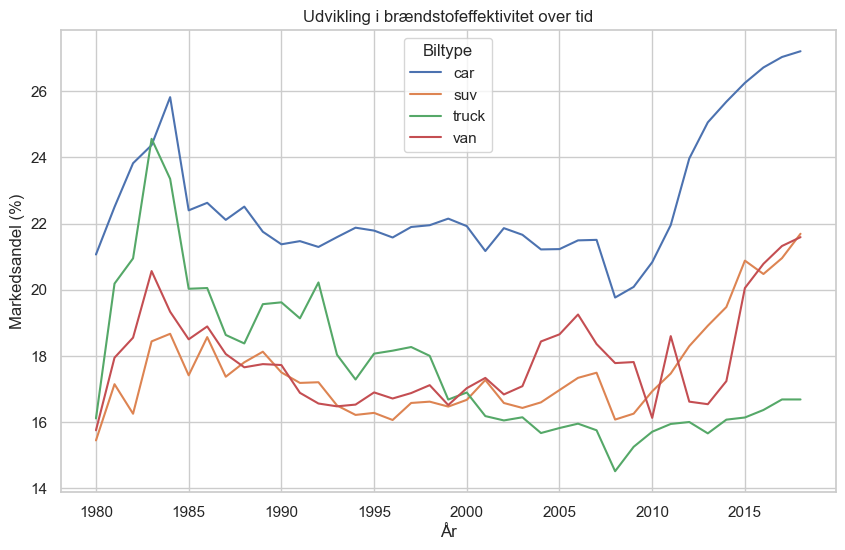

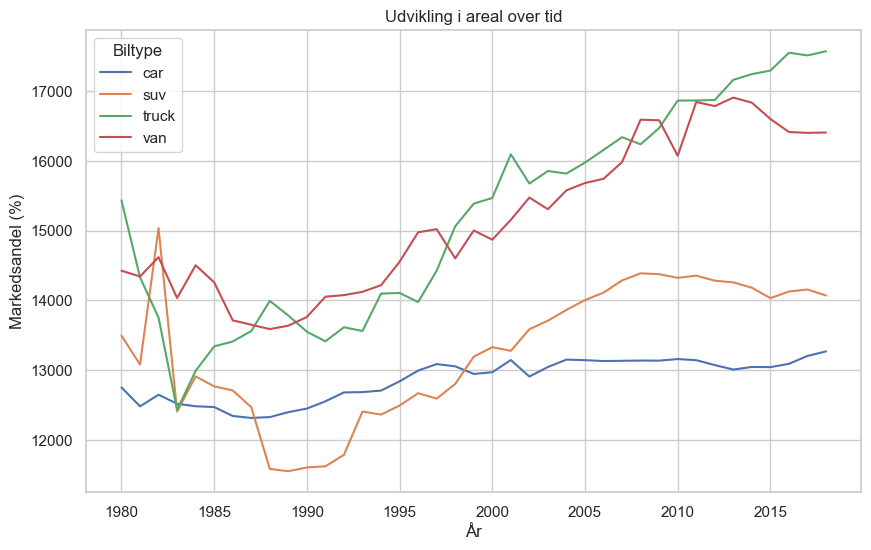

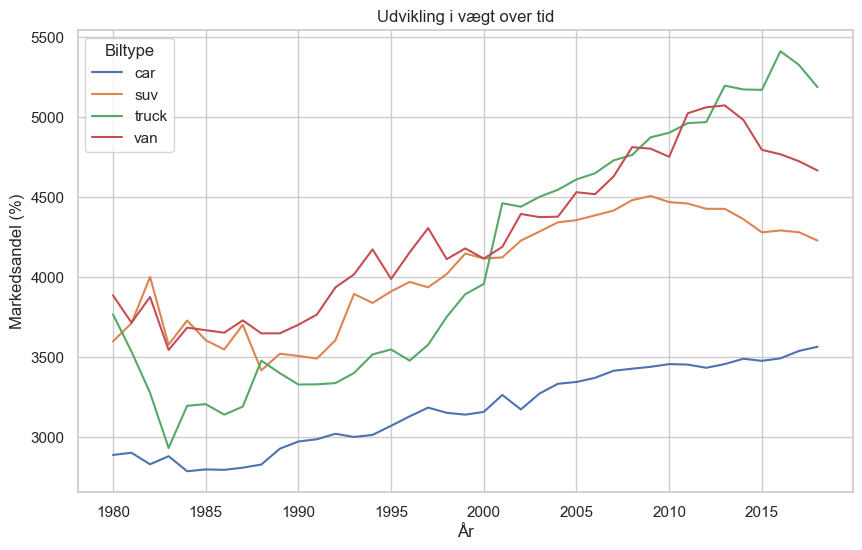

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# price over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='price', hue='type')
plt.title("Udvikling i bilpriser over tid")
plt.xlabel("År")
plt.ylabel("Pris (gennemsnit i $1000)")
plt.legend(title='Biltype')
plt.show()

# market_share over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='market_share', hue='type')
plt.title("Udvikling i markedsandele over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

# hp over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='hp', hue='type')
plt.title("Udvikling i hestekræfter over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

# mpg over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='mpg', hue='type')
plt.title("Udvikling i brændstofeffektivitet over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

#footprint over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='footprint', hue='type')
plt.title("Udvikling i areal over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

# weight over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='weight', hue='type')
plt.title("Udvikling i vægt over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

Regression af dlogS på pris:
                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1152.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          1.30e-238
Time:                        18:12:46   Log-Likelihood:                -19742.
No. Observations:                9694   AIC:                         3.949e+04
Df Residuals:                    9692   BIC:                         3.950e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9072  

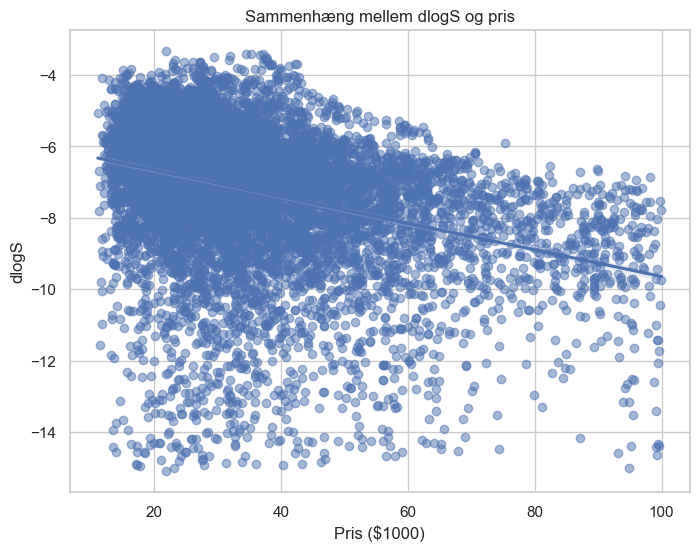

Regression af pris på fysiske attributter (vægt, footprint, hp):
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     3265.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:12:46   Log-Likelihood:                -37906.
No. Observations:                9694   AIC:                         7.582e+04
Df Residuals:                    9690   BIC:                         7.585e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

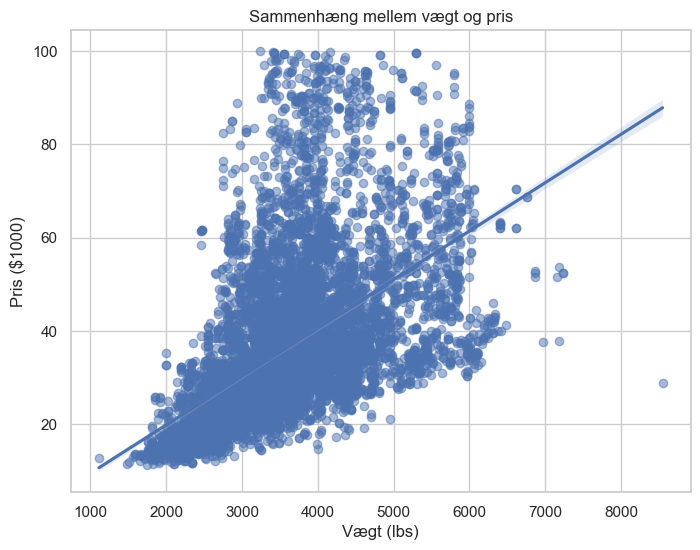

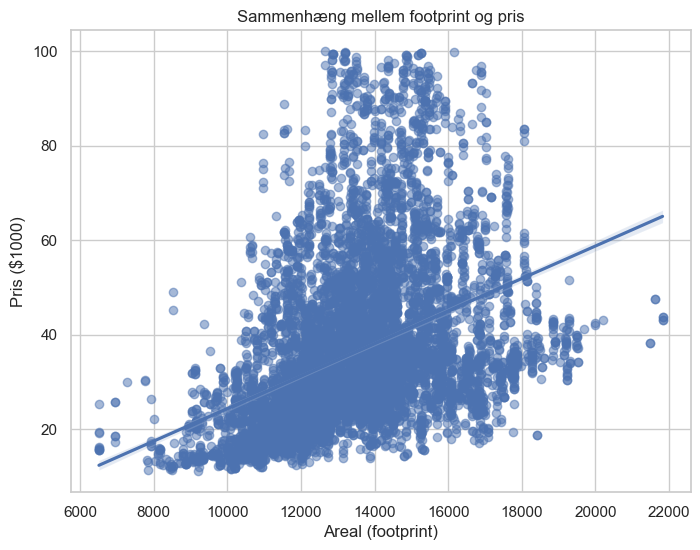

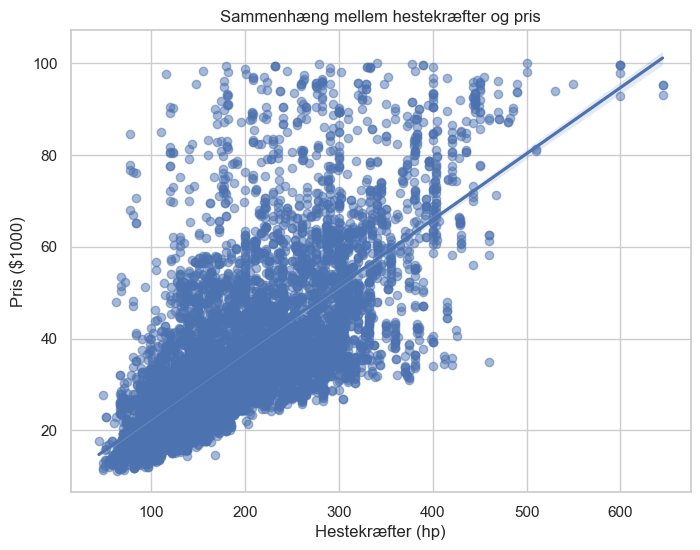

In [5]:
import statsmodels.api as sm

X = df['price']
y = df['dlogS']
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print("Regression af dlogS på pris:")
print(model1.summary())

# Scatter plot for dlogS/price
plt.figure(figsize=(8, 6))
sns.regplot(x='price', y='dlogS', data=df, scatter_kws={'alpha':0.5})
plt.title("Sammenhæng mellem dlogS og pris")
plt.xlabel("Pris ($1000)")
plt.ylabel("dlogS")
plt.show()

X = df[['weight', 'footprint', 'hp']]
y = df['price']
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
print("Regression af pris på fysiske attributter (vægt, footprint, hp):")
print(model2.summary())

# scatter for weight/price
plt.figure(figsize=(8, 6))
sns.regplot(x='weight', y='price', data=df, scatter_kws={'alpha':0.5})
plt.title("Sammenhæng mellem vægt og pris")
plt.xlabel("Vægt (lbs)")
plt.ylabel("Pris ($1000)")
plt.show()

# scatter for footprint/price
plt.figure(figsize=(8, 6))
sns.regplot(x='footprint', y='price', data=df, scatter_kws={'alpha':0.5})
plt.title("Sammenhæng mellem footprint og pris")
plt.xlabel("Areal (footprint)")
plt.ylabel("Pris ($1000)")
plt.show()

# scatter for hp/price
plt.figure(figsize=(8, 6))
sns.regplot(x='hp', y='price', data=df, scatter_kws={'alpha':0.5})
plt.title("Sammenhæng mellem hestekræfter og pris")
plt.xlabel("Hestekræfter (hp)")
plt.ylabel("Pris ($1000)")
plt.show()


In [6]:
#1.b
# dummy-variabler for make/year
df_dummies = pd.get_dummies(df, columns=['make', 'year'], drop_first=True)

X = df_dummies[['price', 'hp', 'mpg', 'height', 'footprint', 'weight', 'number_trims', 'releaseYear', 'yearsSinceDesign',
                'sport', 'EV', 'truck', 'suv', 'van'] + [col for col in df_dummies.columns if 'make_' in col or 'year_' in col]]
X = sm.add_constant(X)
y = df_dummies['dlogS']  # dlogS = log(s_jt / s_0t) in the data

# Convert boolean columns in X to float
X = X.apply(lambda x: x.astype(float) if x.dtype == 'bool' else x)
y = pd.to_numeric(y, errors='coerce')

# Drop rows with NaN values
X = X.dropna()
y = y.loc[X.index]

# Estimate OLS
try:
    ols_model = sm.OLS(y, X).fit()
    print("OLS Regression Resultater:")
    print(ols_model.summary())

except Exception as e:
    print("An error occurred:", e)



OLS Regression Resultater:
                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     65.80
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:12:48   Log-Likelihood:                -17502.
No. Observations:                9694   AIC:                         3.523e+04
Df Residuals:                    9580   BIC:                         3.605e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const    

In [7]:

# Model 1: Level 
X_level = df_dummies[['price', 'hp', 'mpg', 'height', 'footprint', 'weight', 'number_trims', 'releaseYear', 
                      'yearsSinceDesign', 'sport', 'EV', 'truck', 'suv', 'van'] + 
                     [col for col in df_dummies.columns if 'year_' in col]]
X_level = sm.add_constant(X_level)

# Convert boolean columns in X_level to float
X_level = X_level.apply(lambda x: x.astype(float) if x.dtype == 'bool' else x)
y = pd.to_numeric(y, errors='coerce')

# Drop rows with NaN values
X_level = X_level.dropna()
y = y.loc[X_level.index]

level_model = sm.OLS(y, X_level).fit()

# Model 2: Log-Transformed
df_log = df_dummies.copy()
for var in ['hp', 'mpg', 'height', 'footprint', 'weight', 'number_trims']:
    df_log['log_' + var] = np.log(df_log[var] + 1)  # Tilføj +1 for at undgå log(0)

X_log = df_log[['price', 'log_hp', 'log_mpg', 'log_height', 'log_footprint', 'log_weight', 'log_number_trims', 
                'releaseYear', 'yearsSinceDesign', 'sport', 'EV', 'truck', 'suv', 'van'] + 
               [col for col in df_log.columns if 'year_' in col]]
X_log = sm.add_constant(X_log)

# Convert boolean columns in X_log to float
X_log = X_log.apply(lambda x: x.astype(float) if x.dtype == 'bool' else x)

# Drop rows with NaN values
X_log = X_log.loc[X_level.index].dropna()

log_model = sm.OLS(y, X_log).fit()

# Save in .tex 
with open("level_model_results.txt", "w") as f:
    f.write("Level Model Results:\n")
    f.write(level_model.summary().as_text())
    
with open("log_transformed_model_results.txt", "w") as f:
    f.write("Log-Transformed Model Results:\n")
    f.write(log_model.summary().as_latex())


### Problem 2

In [8]:
# dummies for brand

X_with_dummies = df_dummies[['price', 'hp', 'mpg', 'height', 'footprint', 'weight', 'number_trims', 'releaseYear', 'yearsSinceDesign'] + 
                            [col for col in df_dummies.columns if 'make_' in col]]
X_with_dummies = sm.add_constant(X_with_dummies) 

# Convert boolean columns in X_with_dummies to float
X_with_dummies = X_with_dummies.apply(lambda x: x.astype(float) if x.dtype == 'bool' else x)
y = pd.to_numeric(df_dummies['dlogS'], errors='coerce')

# Drop rows with NaN values
X_with_dummies = X_with_dummies.dropna()
y = y.loc[X_with_dummies.index]

model_with_dummies = sm.OLS(y, X_with_dummies).fit()
print(model_with_dummies.summary())


                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     83.11
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:12:48   Log-Likelihood:                -17995.
No. Observations:                9694   AIC:                         3.613e+04
Df Residuals:                    9623   BIC:                         3.664e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.9716      0

In [9]:
# Within-transformation for model_within
def within(df, group_var, vars_to_transform):
    df_within = df.copy()
    for var in vars_to_transform:
        df_within[var] = df[var] - df.groupby(group_var)[var].transform('mean')
    return df_within

# Apply within transformation
df_within = within(df, 'make', ['dlogS', 'price', 'hp', 'mpg', 'height', 'footprint', 'weight', 'number_trims', 'releaseYear', 'yearsSinceDesign'])

X_within = df_within[['price', 'hp', 'mpg', 'height', 'footprint', 'weight', 'number_trims', 'releaseYear', 'yearsSinceDesign']]
X_within = sm.add_constant(X_within)

# Convert boolean columns in X_within to float
X_within = X_within.apply(lambda x: x.astype(float) if x.dtype == 'bool' else x)
y_within = pd.to_numeric(df_within['dlogS'], errors='coerce')

# Drop rows with NaN values to align
X_within = X_within.dropna()
y_within = y_within.loc[X_within.index]

model_within = sm.OLS(y_within, X_within).fit()
print(model_within.summary())


                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     331.8
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:12:48   Log-Likelihood:                -17995.
No. Observations:                9694   AIC:                         3.601e+04
Df Residuals:                    9684   BIC:                         3.608e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.123e-17      0.016  

In [10]:
comparison_df = pd.DataFrame({
    'Variable': X_within.columns,
    'Model 1 (Dummies)': model_with_dummies.params[X_within.columns],
    'Model 2 (Within)': model_within.params
}).set_index('Variable')

comparison_df['Difference'] = comparison_df['Model 1 (Dummies)'] - comparison_df['Model 2 (Within)']
comparison_df['Pct Difference'] = (comparison_df['Difference'] / comparison_df['Model 1 (Dummies)']) * 100

print(comparison_df)



                  Model 1 (Dummies)  Model 2 (Within)    Difference  \
Variable                                                              
const                     -4.971559      3.122502e-17 -4.971559e+00   
price                     -0.029053     -2.905290e-02 -7.979728e-16   
hp                        -0.004029     -4.029324e-03  5.299580e-16   
mpg                       -0.067616     -6.761578e-02  7.563394e-15   
height                     0.012336      1.233628e-02 -1.552578e-14   
footprint                  0.000164      1.637745e-04  1.817665e-16   
weight                    -0.000539     -5.391142e-04 -1.257675e-17   
number_trims               0.046599      4.659907e-02 -2.033096e-15   
releaseYear               -1.055526     -1.055526e+00  5.306866e-14   
yearsSinceDesign          -0.144925     -1.449251e-01 -8.354428e-15   

                  Pct Difference  
Variable                          
const               1.000000e+02  
price               2.746620e-12  
hp     

In [11]:
y_pred_dummies = model_with_dummies.fittedvalues
y_mean = y.mean()
TSS_dummies = ((y - y_mean) ** 2).sum()
ESS_dummies = ((y_pred_dummies - y_mean) ** 2).sum()
RSS_dummies = ((y - y_pred_dummies) ** 2).sum()
R2_dummies = 1 - (RSS_dummies / TSS_dummies)

y_pred_within = model_within.fittedvalues
TSS_within = ((y_within - y_within.mean()) ** 2).sum() 
ESS_within = ((y_pred_within - y_within.mean()) ** 2).sum()
RSS_within = ((y_within - y_pred_within) ** 2).sum()
R2_within = 1 - (RSS_within / TSS_within)

comparison_metrics = pd.DataFrame({
    'Model': ['With Dummies', 'Within-Transformation'],
    'TSS': [TSS_dummies, TSS_within],
    'ESS': [ESS_dummies, ESS_within],
    'RSS': [RSS_dummies, RSS_within],
    'R2': [R2_dummies, R2_within]
})

print(comparison_metrics)


                   Model           TSS           ESS           RSS        R2
0           With Dummies  37300.695201  14053.669318  23247.025884  0.376767
1  Within-Transformation  30415.614481   7168.588598  23247.025884  0.235688


In [12]:
#2.c
y = pd.to_numeric(df['price'], errors='coerce')

# RXR, characteristics & dummies
X = df[['RXR', 'hp', 'mpg', 'weight', 'footprint', 'number_trims']]
X = sm.add_constant(X)

year_dummies = [col for col in df.columns if 'year_' in col]
make_dummies = [col for col in df.columns if 'make_' in col]
X = pd.concat([X, df[year_dummies + make_dummies]], axis=1)

# Convert boolean columns in X to float
X = X.apply(lambda x: x.astype(float) if x.dtype == 'bool' else x)

# Drop rows with NaN values 
X = X.dropna()
y = y.loc[X.index]

first_stage_model = sm.OLS(y, X).fit()

print("Første fase OLS regression resultater:")
print(first_stage_model.summary())

# t-test for RXR-koefficienten 
gamma1_p_value = first_stage_model.pvalues['RXR']
if gamma1_p_value < 0.05:
    print("RXR er en signifikant prædiktor for prisen (p-værdi < 0.05).")
else:
    print("RXR er ikke en signifikant prædiktor for prisen (p-værdi >= 0.05).")


Første fase OLS regression resultater:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1791.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:12:48   Log-Likelihood:                -37674.
No. Observations:                9694   AIC:                         7.536e+04
Df Residuals:                    9687   BIC:                         7.541e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const    

In [13]:
from linearmodels.iv import IV2SLS

y = df['dlogS']

endog = df['price']

instr = df['RXR']

exog = df[['hp', 'mpg', 'weight', 'footprint', 'number_trims']] 

year_dummies = [col for col in df.columns if 'year_' in col]
make_dummies = [col for col in df.columns if 'make_' in col]
exog = pd.concat([exog, df[year_dummies + make_dummies]], axis=1)

model_2sls = IV2SLS(dependent=y, exog=exog, endog=endog, instruments=instr).fit()

print("2SLS Regression Results:")
print(model_2sls.summary)


2SLS Regression Results:
                          IV-2SLS Estimation Summary                          
Dep. Variable:                  dlogS   R-squared:                     -69.630
Estimator:                    IV-2SLS   Adj. R-squared:                -69.674
No. Observations:                9694   F-statistic:                    162.70
Date:                Fri, Nov 01 2024   P-value (F-stat)                0.0000
Time:                        18:12:48   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                               
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
hp              -0.7016     1.0520    -0.6669     0.5048     -2.7636      1.3603
mpg             -0.

### Problem 3

In [14]:
#3.a
def gh_iv(df, characteristics):
    df_iv = df.copy()
    for char in characteristics:
        df_iv[char] = df_iv.groupby('year')[char].transform(lambda x: x / x.std())
        
        df_iv[f'gh_iv_{char}'] = df_iv.groupby('year').apply(
            lambda group: group[char].apply(lambda x: ((group[char] - x).abs() < group[char].std()).sum())
        ).reset_index(level=0, drop=True)
    
    return df_iv[[f'gh_iv_{char}' for char in characteristics]] 


In [15]:
y = df['dlogS'] 
endog = df['price']

exog = sm.add_constant(df[['hp', 'mpg', 'height', 'footprint', 'weight', 'number_trims', 
                           'releaseYear', 'yearsSinceDesign', 'sport', 'EV', 'truck', 'suv', 'van']])

characteristics = ['hp', 'mpg', 'height', 'footprint', 'weight']
instruments = gh_iv(df, characteristics)

instruments['RXR'] = df['RXR']

iv_model = IV2SLS(y, exog, endog=endog, instruments=instruments).fit()

print(iv_model.summary)

C:\Users\clara\AppData\Local\Temp\ipykernel_23440\548569396.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_iv[f'gh_iv_{char}'] = df_iv.groupby('year').apply(
C:\Users\clara\AppData\Local\Temp\ipykernel_23440\548569396.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_iv[f'gh_iv_{char}'] = df_iv.groupby('year').apply(
C:\Users\clara\AppData\Local\Temp\ipykernel_23440\548569396.py:7: DeprecationW

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  dlogS   R-squared:                      0.2525
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2514
No. Observations:                9694   F-statistic:                    2818.4
Date:                Fri, Nov 01 2024   P-value (F-stat)                0.0000
Time:                        18:12:55   Distribution:                 chi2(14)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const               -7.3119     0.3935    -18.580     0.0000     -8.0832     -6.5405
hp                  -0.0065 

C:\Users\clara\AppData\Local\Temp\ipykernel_23440\548569396.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_iv[f'gh_iv_{char}'] = df_iv.groupby('year').apply(


In [16]:
# Wooldridge's score test of overidentification
if hasattr(iv_model, 'wooldridge_overid'):
    overid_test = iv_model.wooldridge_overid
    print("Overidentification Test:")
    print(overid_test)
else:
    print("Overidentification test not available in this model version.")

#tyder på mindst et instrument ikke er eksogent

Overidentification Test:
Wooldridge's score test of overidentification
H0: Model is not overidentified.
Statistic: 257.3201
P-value: 0.0000
Distributed: chi2(5)


In [17]:
#3.b
alpha_OLS = 0.04
alpha_IV = 0.15

# marginalomkostninger, priselasticitet og markup baseret på alpha_OLS
df['mc_OLS'] = df['price'] - (1 / (alpha_OLS * (1 - df['market_share'])))
df['elasticity_OLS'] = -alpha_OLS * df['price'] * (1 - df['market_share'])
df['markup_OLS'] = (df['price'] - df['mc_OLS']) / df['price']

# marginalomkostninger, priselasticitet og markup baseret på alpha_IV
df['mc_IV'] = df['price'] - (1 / (alpha_IV * (1 - df['market_share'])))
df['elasticity_IV'] = -alpha_IV * df['price'] * (1 - df['market_share'])
df['markup_IV'] = (df['price'] - df['mc_IV']) / df['price']

print(df[['price', 'market_share', 'mc_OLS', 'elasticity_OLS', 'markup_OLS', 
          'mc_IV', 'elasticity_IV', 'markup_IV']].head())


       price  market_share     mc_OLS  elasticity_OLS  markup_OLS      mc_IV  \
0  33.673122      0.000093   8.670803       -1.346800    0.742501  27.005837   
1  14.033105      0.002011 -11.017281       -0.560195    1.785092   7.353002   
2  20.854034      0.001010  -4.171246       -0.833319    1.200021  14.180626   
3  15.772140      0.000064  -9.229472       -0.630845    1.585176   9.105043   
4  12.721277      0.001539 -12.317253       -0.508068    1.968240   6.044336   

   elasticity_IV  markup_IV  
0      -5.050500   0.198000  
1      -2.100732   0.476025  
2      -3.124945   0.320006  
3      -2.365668   0.422714  
4      -1.905255   0.524864  


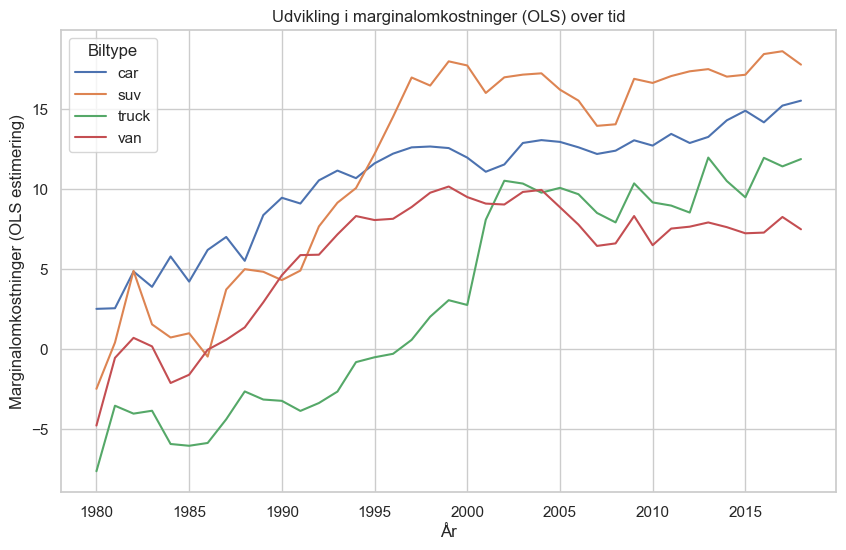

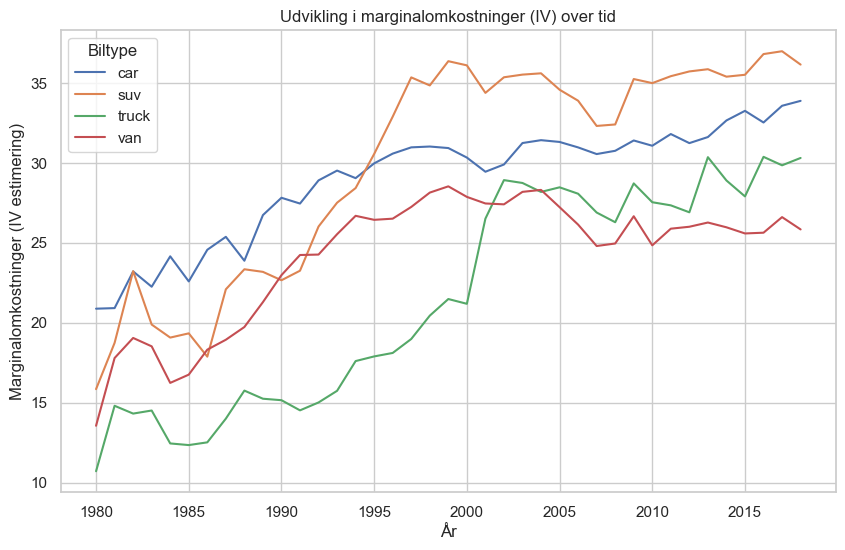

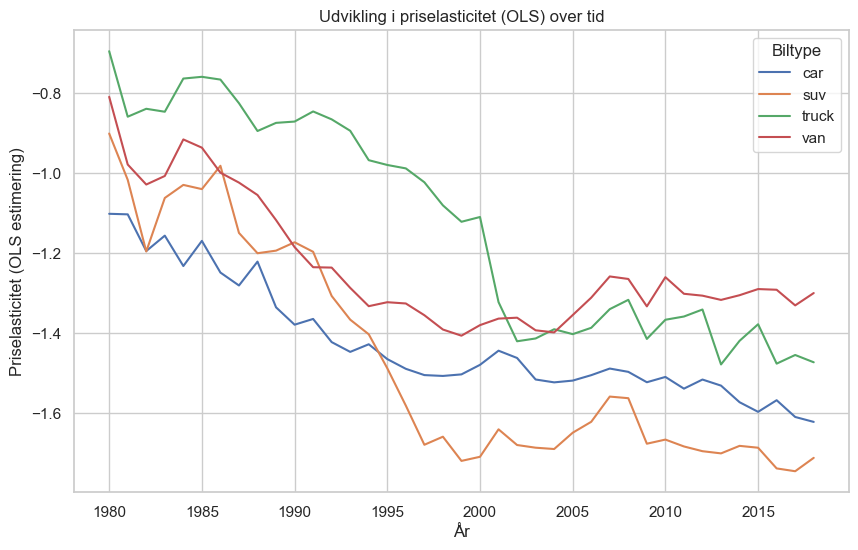

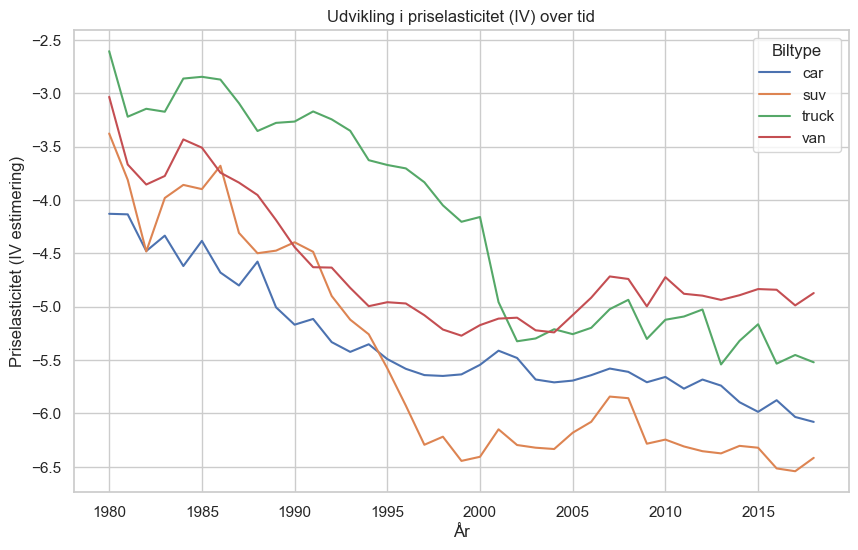

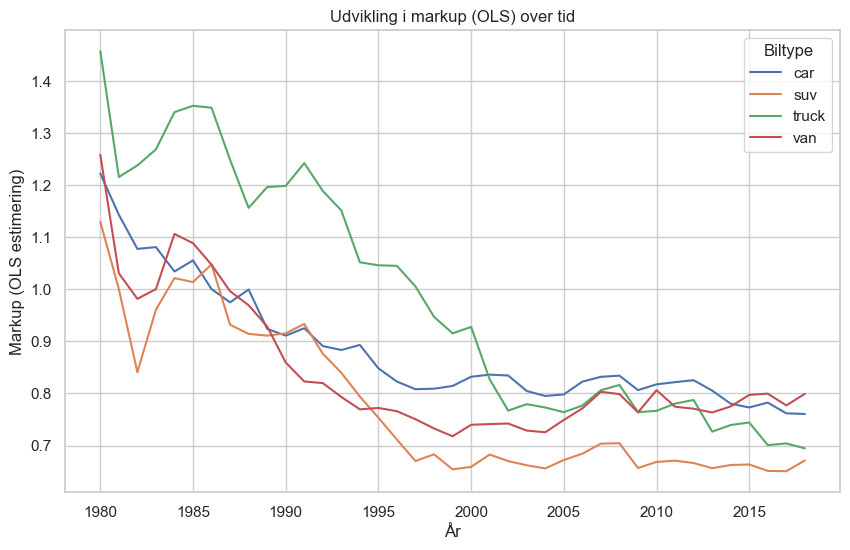

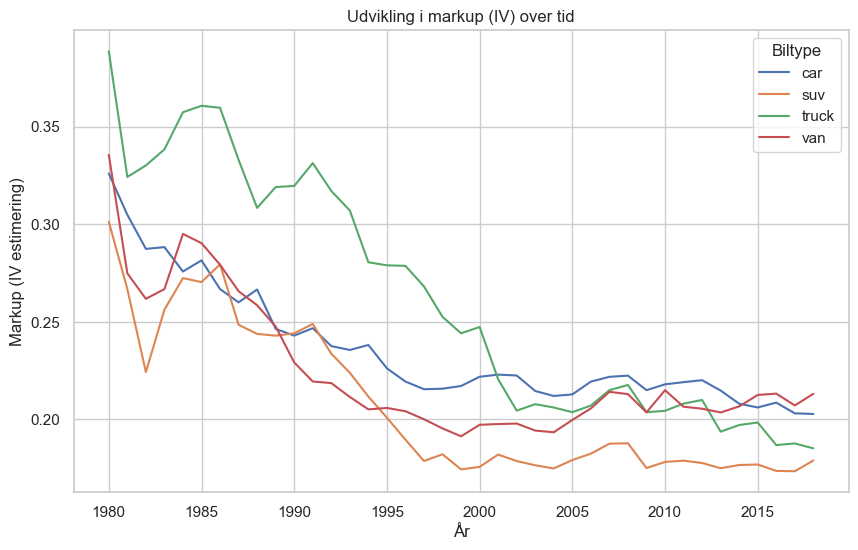

In [24]:

grouped_data = df.groupby(['year', 'type']).agg({
    'price': 'mean',
    'market_share': 'mean',
    'hp': 'mean',
    'mpg': 'mean',
    'footprint': 'mean',
    'weight': 'mean',
    'mc_OLS': 'mean',
    'elasticity_OLS': 'mean',
    'markup_OLS': 'mean',
    'mc_IV': 'mean',
    'elasticity_IV': 'mean',
    'markup_IV': 'mean'
}).reset_index()

sns.set(style="whitegrid")

# marginal cost over time (OLS)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='mc_OLS', hue='type')
plt.title("Udvikling i marginalomkostninger (OLS) over tid")
plt.xlabel("År")
plt.ylabel("Marginalomkostninger (OLS estimering)")
plt.legend(title='Biltype')
plt.show()

# marginal cost over time (IV)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='mc_IV', hue='type')
plt.title("Udvikling i marginalomkostninger (IV) over tid")
plt.xlabel("År")
plt.ylabel("Marginalomkostninger (IV estimering)")
plt.legend(title='Biltype')
plt.show()

# price elasticity over time (OLS)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='elasticity_OLS', hue='type')
plt.title("Udvikling i priselasticitet (OLS) over tid")
plt.xlabel("År")
plt.ylabel("Priselasticitet (OLS estimering)")
plt.legend(title='Biltype')
plt.show()

# price elasticity over time (IV)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='elasticity_IV', hue='type')
plt.title("Udvikling i priselasticitet (IV) over tid")
plt.xlabel("År")
plt.ylabel("Priselasticitet (IV estimering)")
plt.legend(title='Biltype')
plt.show()

# markup over time (OLS)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='markup_OLS', hue='type')
plt.title("Udvikling i markup (OLS) over tid")
plt.xlabel("År")
plt.ylabel("Markup (OLS estimering)")
plt.legend(title='Biltype')
plt.show()

# markup over time (IV)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='markup_IV', hue='type')
plt.title("Udvikling i markup (IV) over tid")
plt.xlabel("År")
plt.ylabel("Markup (IV estimering)")
plt.legend(title='Biltype')
plt.show()


In [ ]:
#3.c
import statsmodels.formula.api as smf

# results from before
df['log_mc_IV'] = np.log(df['mc_IV'])  # Log-transform

# Estimering af marginalomkostningsfunktionen
# include make & year for fixed effects
formula = 'log_mc_IV ~ hp + mpg + height + footprint + weight + RXR + C(make) + C(year)'

mc_model = smf.ols(formula=formula, data=df).fit()

print(mc_model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_mc_IV   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     447.0
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:02:42   Log-Likelihood:                 401.20
No. Observations:                9694   AIC:                            -590.4
Df Residuals:                    9588   BIC:                             170.6
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Problem 4

C:\Users\clara\AppData\Local\Temp\ipykernel_7340\3158342461.py:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


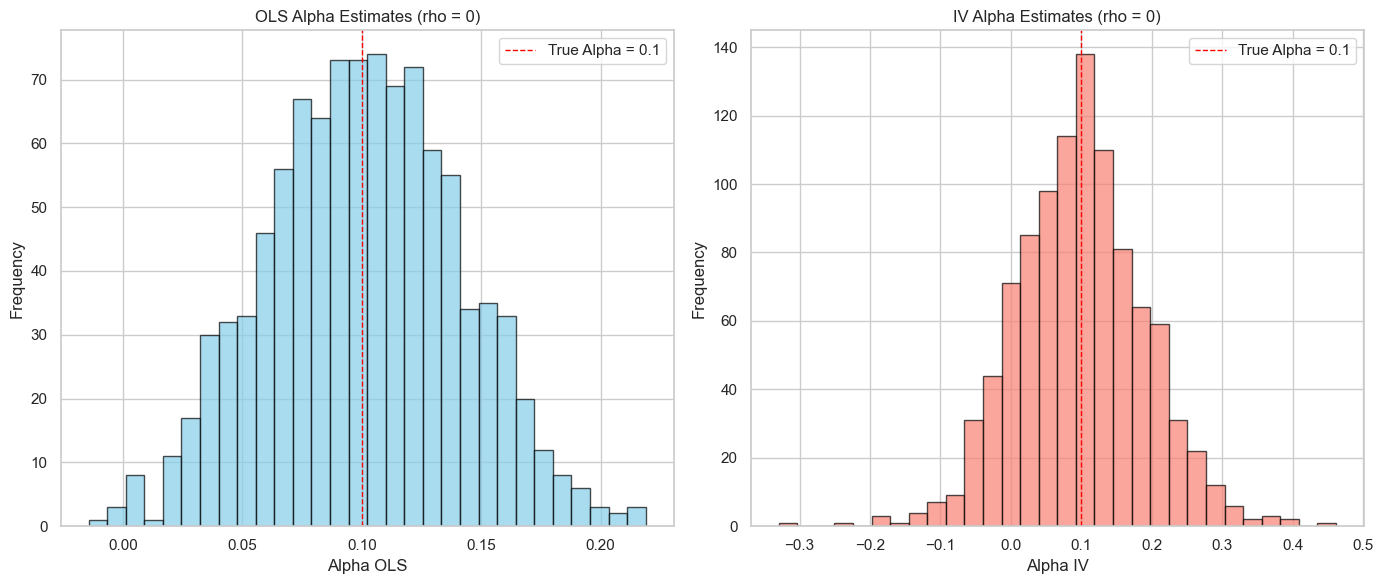

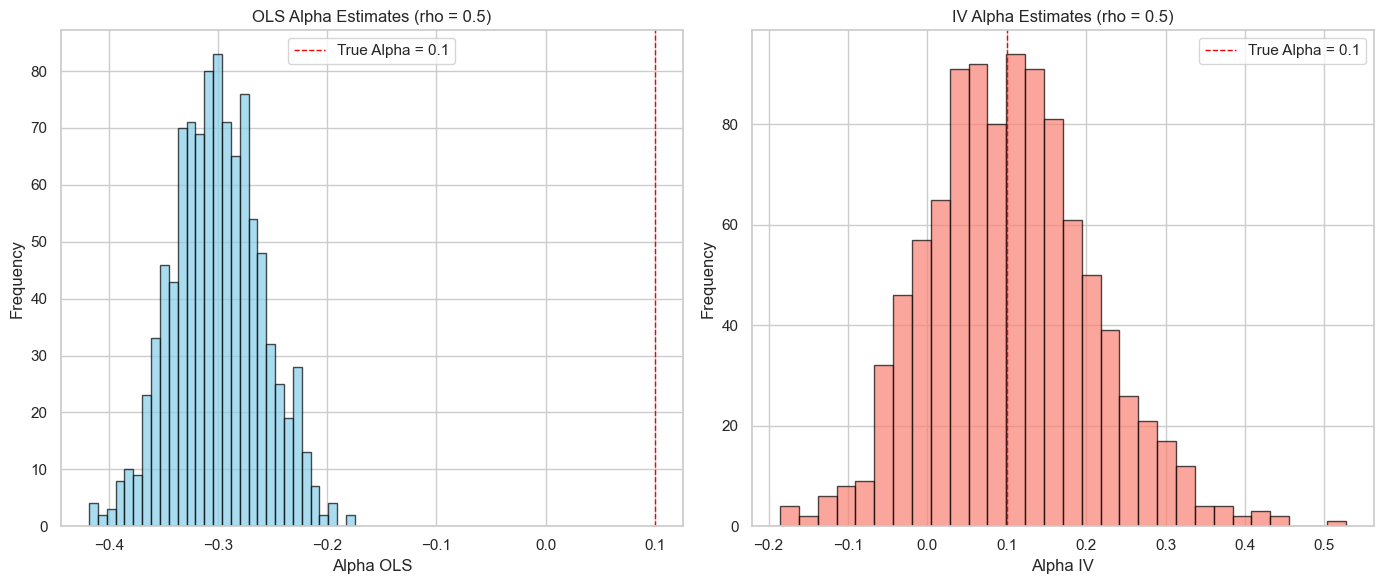

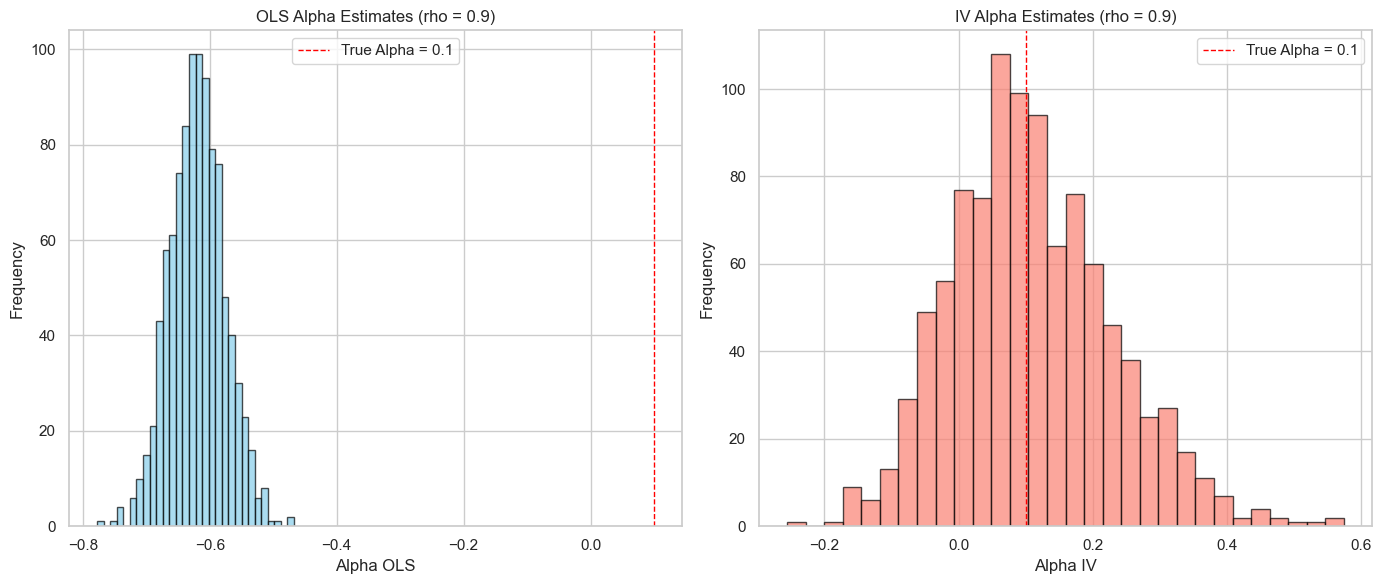


Alpha Estimates, Bias, and Variance:

rho = 0:
  OLS Alpha Mean = 0.1006, Bias = 0.0006, Variance = 0.0016
  IV Alpha Mean  = 0.0979, Bias = -0.0021, Variance = 0.0083

rho = 0.5:
  OLS Alpha Mean = -0.3007, Bias = -0.4007, Variance = 0.0016
  IV Alpha Mean  = 0.1044, Bias = 0.0044, Variance = 0.0106

rho = 0.9:
  OLS Alpha Mean = -0.6197, Bias = -0.7197, Variance = 0.0018
  IV Alpha Mean  = 0.1086, Bias = 0.0086, Variance = 0.0145


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.gmm import IV2SLS

# Simulation parameters
np.random.seed(0)
n = 500
alpha = 0.1
beta0 = 0
gamma0 = 1
gamma1 = 0.5
rho_values = [0, 0.5, 0.9]  # Different correlation levels
iterations = 1000  # Number of Monte Carlo repetitions

# Function to simulate data and estimate alpha
def monte_carlo_simulation(rho, n=500):
    # Generate instrument, supply shock, and independent error
    z = np.random.normal(0, 1, n)
    nu = np.random.normal(0, 1, n)
    eta = np.random.normal(0, 1, n)
    
    # Generate xi based on rho and calculate price p and log(s)
    xi = rho * nu + eta
    p = gamma0 + gamma1 * z + nu
    log_s = beta0 - alpha * p + xi
    
    # Estimate alpha using OLS
    X_ols = sm.add_constant(p)
    ols_model = sm.OLS(log_s, X_ols).fit()
    alpha_ols = -ols_model.params[1]  # Take negative because model is log(s) = beta0 - alpha * p
    
    # Estimate alpha using IV
    X_iv = sm.add_constant(z)  # z is instrument for p
    iv_model = IV2SLS(log_s, X_ols, instrument=X_iv).fit()
    alpha_iv = -iv_model.params[1]  # Take negative because model is log(s) = beta0 - alpha * p
    
    # Collect results
    return alpha_ols, alpha_iv

# Store results
results_df = pd.DataFrame(columns=['rho', 'alpha_ols', 'alpha_iv'])

# Run simulation for each rho and collect alpha estimates
for rho in rho_values:
    alphas_ols = []
    alphas_iv = []
    
    for _ in range(iterations):
        alpha_ols, alpha_iv = monte_carlo_simulation(rho, n)
        alphas_ols.append(alpha_ols)
        alphas_iv.append(alpha_iv)
    
    # Save results to dataframe
    temp_df = pd.DataFrame({
        'rho': rho,
        'alpha_ols': alphas_ols,
        'alpha_iv': alphas_iv
    })
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Plot distributions of alpha estimates for each rho level
for rho in rho_values:
    subset = results_df[results_df['rho'] == rho]
    plt.figure(figsize=(14, 6))

    # OLS alpha estimates histogram
    plt.subplot(1, 2, 1)
    plt.hist(subset['alpha_ols'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(x=alpha, color='red', linestyle='dashed', linewidth=1, label=f'True Alpha = {alpha}')
    plt.title(f'OLS Alpha Estimates (rho = {rho})')
    plt.xlabel('Alpha OLS')
    plt.ylabel('Frequency')
    plt.legend()

    # IV alpha estimates histogram
    plt.subplot(1, 2, 2)
    plt.hist(subset['alpha_iv'], bins=30, alpha=0.7, color='salmon', edgecolor='black')
    plt.axvline(x=alpha, color='red', linestyle='dashed', linewidth=1, label=f'True Alpha = {alpha}')
    plt.title(f'IV Alpha Estimates (rho = {rho})')
    plt.xlabel('Alpha IV')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Calculate and display alpha estimates, bias, and variance
print("\nAlpha Estimates, Bias, and Variance:")
for rho in rho_values:
    subset = results_df[results_df['rho'] == rho]
    alpha_ols_mean = np.mean(subset['alpha_ols'])
    alpha_iv_mean = np.mean(subset['alpha_iv'])
    bias_ols = alpha_ols_mean - alpha
    bias_iv = alpha_iv_mean - alpha
    var_ols = np.var(subset['alpha_ols'])
    var_iv = np.var(subset['alpha_iv'])
    
    print(f"\nrho = {rho}:")
    print(f"  OLS Alpha Mean = {alpha_ols_mean:.4f}, Bias = {bias_ols:.4f}, Variance = {var_ols:.4f}")
    print(f"  IV Alpha Mean  = {alpha_iv_mean:.4f}, Bias = {bias_iv:.4f}, Variance = {var_iv:.4f}")


C:\Users\clara\AppData\Local\Temp\ipykernel_7340\3012418692.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


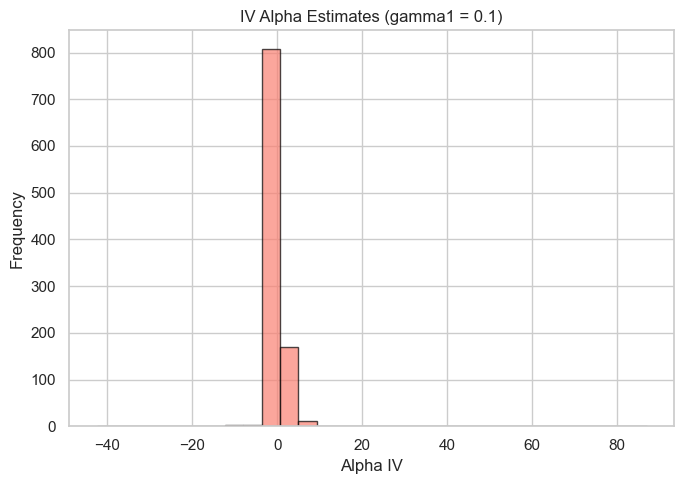

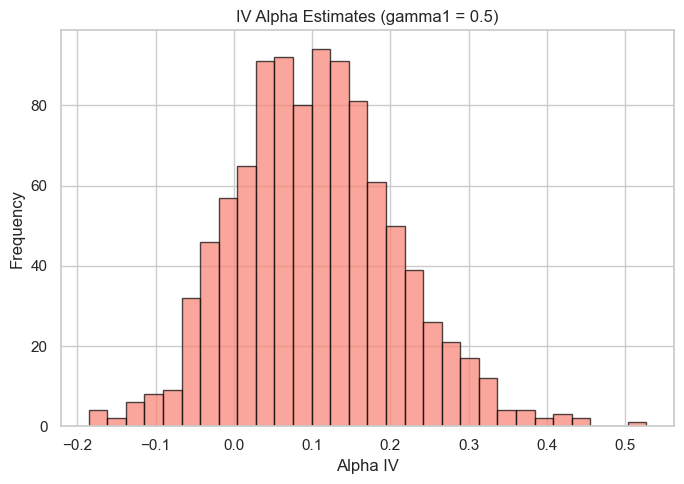

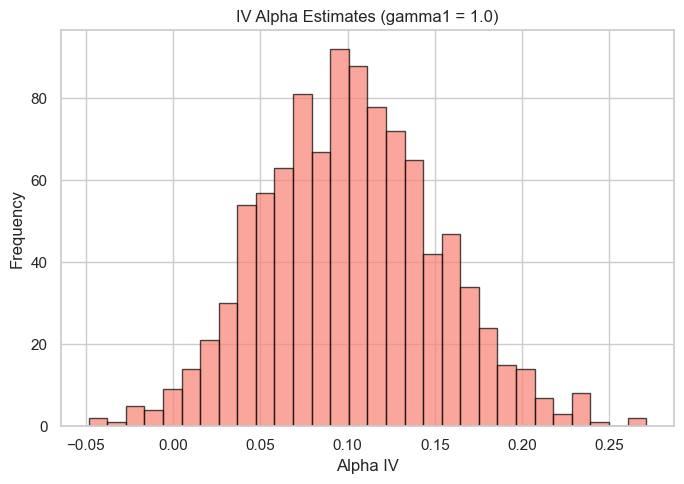


Bias and Variance of IV Estimator at Different Levels of Instrument Strength:

gamma1 = 0.1:
  IV Alpha Mean = 0.3283, Bias = 0.2283, Variance = 16.3798

gamma1 = 0.5:
  IV Alpha Mean = 0.1044, Bias = 0.0044, Variance = 0.0106

gamma1 = 1.0:
  IV Alpha Mean = 0.1019, Bias = 0.0019, Variance = 0.0025


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS

# Simulation parameters
np.random.seed(0)
n = 500
alpha = 0.1
beta0 = 0
rho = 0.5  # Moderate correlation level
gamma0 = 1
gamma1_values = [0.1, 0.5, 1.0]  # Different levels of instrument strength
iterations = 1000  # Number of Monte Carlo repetitions

# Function to simulate data and estimate alpha
def monte_carlo_simulation(gamma1, n=500):
    # Generate instrument, supply shock, and independent error
    z = np.random.normal(0, 1, n)
    nu = np.random.normal(0, 1, n)
    eta = np.random.normal(0, 1, n)
    
    # Generate xi based on rho and calculate price p and log(s)
    xi = rho * nu + eta
    p = gamma0 + gamma1 * z + nu
    log_s = beta0 - alpha * p + xi
    
    # Estimate alpha using IV
    X_iv = sm.add_constant(z)  # z is instrument for p
    iv_model = IV2SLS(log_s, sm.add_constant(p), instrument=X_iv).fit()
    alpha_iv = -iv_model.params[1]  # Take negative because model is log(s) = beta0 - alpha * p
    
    return alpha_iv

# Store results
results_df = pd.DataFrame(columns=['gamma1', 'alpha_iv'])

# Run Monte Carlo simulation for each gamma1 level and collect IV estimates
for gamma1 in gamma1_values:
    alphas_iv = []
    
    for _ in range(iterations):
        alpha_iv = monte_carlo_simulation(gamma1, n)
        alphas_iv.append(alpha_iv)
    
    # Save results to dataframe
    temp_df = pd.DataFrame({
        'gamma1': gamma1,
        'alpha_iv': alphas_iv
    })
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Plot Monte Carlo results as a histogram for each gamma1 level
for gamma1 in gamma1_values:
    subset = results_df[results_df['gamma1'] == gamma1]
    plt.figure(figsize=(7, 5))
    plt.hist(subset['alpha_iv'], bins=30, alpha=0.7, color='salmon', edgecolor='black')
    plt.title(f'IV Alpha Estimates (gamma1 = {gamma1})')
    plt.xlabel('Alpha IV')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Calculate and display bias and variance for IV estimator at each gamma1 level
print("\nBias and Variance of IV Estimator at Different Levels of Instrument Strength:")
for gamma1 in gamma1_values:
    subset = results_df[results_df['gamma1'] == gamma1]
    alpha_iv_mean = np.mean(subset['alpha_iv'])
    bias_iv = alpha_iv_mean - alpha
    var_iv = np.var(subset['alpha_iv'])
    
    print(f"\ngamma1 = {gamma1}:")
    print(f"  IV Alpha Mean = {alpha_iv_mean:.4f}, Bias = {bias_iv:.4f}, Variance = {var_iv:.4f}")
